In [1]:
!pip install pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

### Fuel Consumption- Assignment 

*Problem Stastement:* Ability to model and predict the fuel consumption is vital in enhancing fuel economy of vehicles and preventing fraudulent activities in fleet management. Fuel consumption of a vehicle depends on several internal factors such as distance, load, vehicle characteristics, and driver behavior, as well as external factors such as road conditions, traffic, and weather. However, not all these factors may be measured or available for the fuel consumption analysis. We consider a case where only a subset of the aforementioned factors is available as a multi-variate time series from a long distance, public bus. Hence, the challenge is to model and/or predict the fuel consumption only with the available data, while still indirectly capturing as much as influences from other internal and external factors. Machine Learning (ML) is suitable in such analysis, as the model can be developed by learning the patterns in data.*


### Things to do in assignment:
* Data Loading
* EDA
* Seprating the Feature(X/input/indpendent) and Target(Y/Output/Dependending)
* Model Selection for Train and Testing process Splitting the Data in to 75% For Train and 25% Testing
* Apply the linear Regression Model
* Fit the Model
* New_predication
* Comparing the Actual Data and New predication and find the Error
* Find the Train Score and Test Score
* Final Find the Overall Error in the data

### Data Loading

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv")

### EDA

In [4]:
df.shape

(1067, 13)

In [5]:
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [6]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### Bivariate Analysis

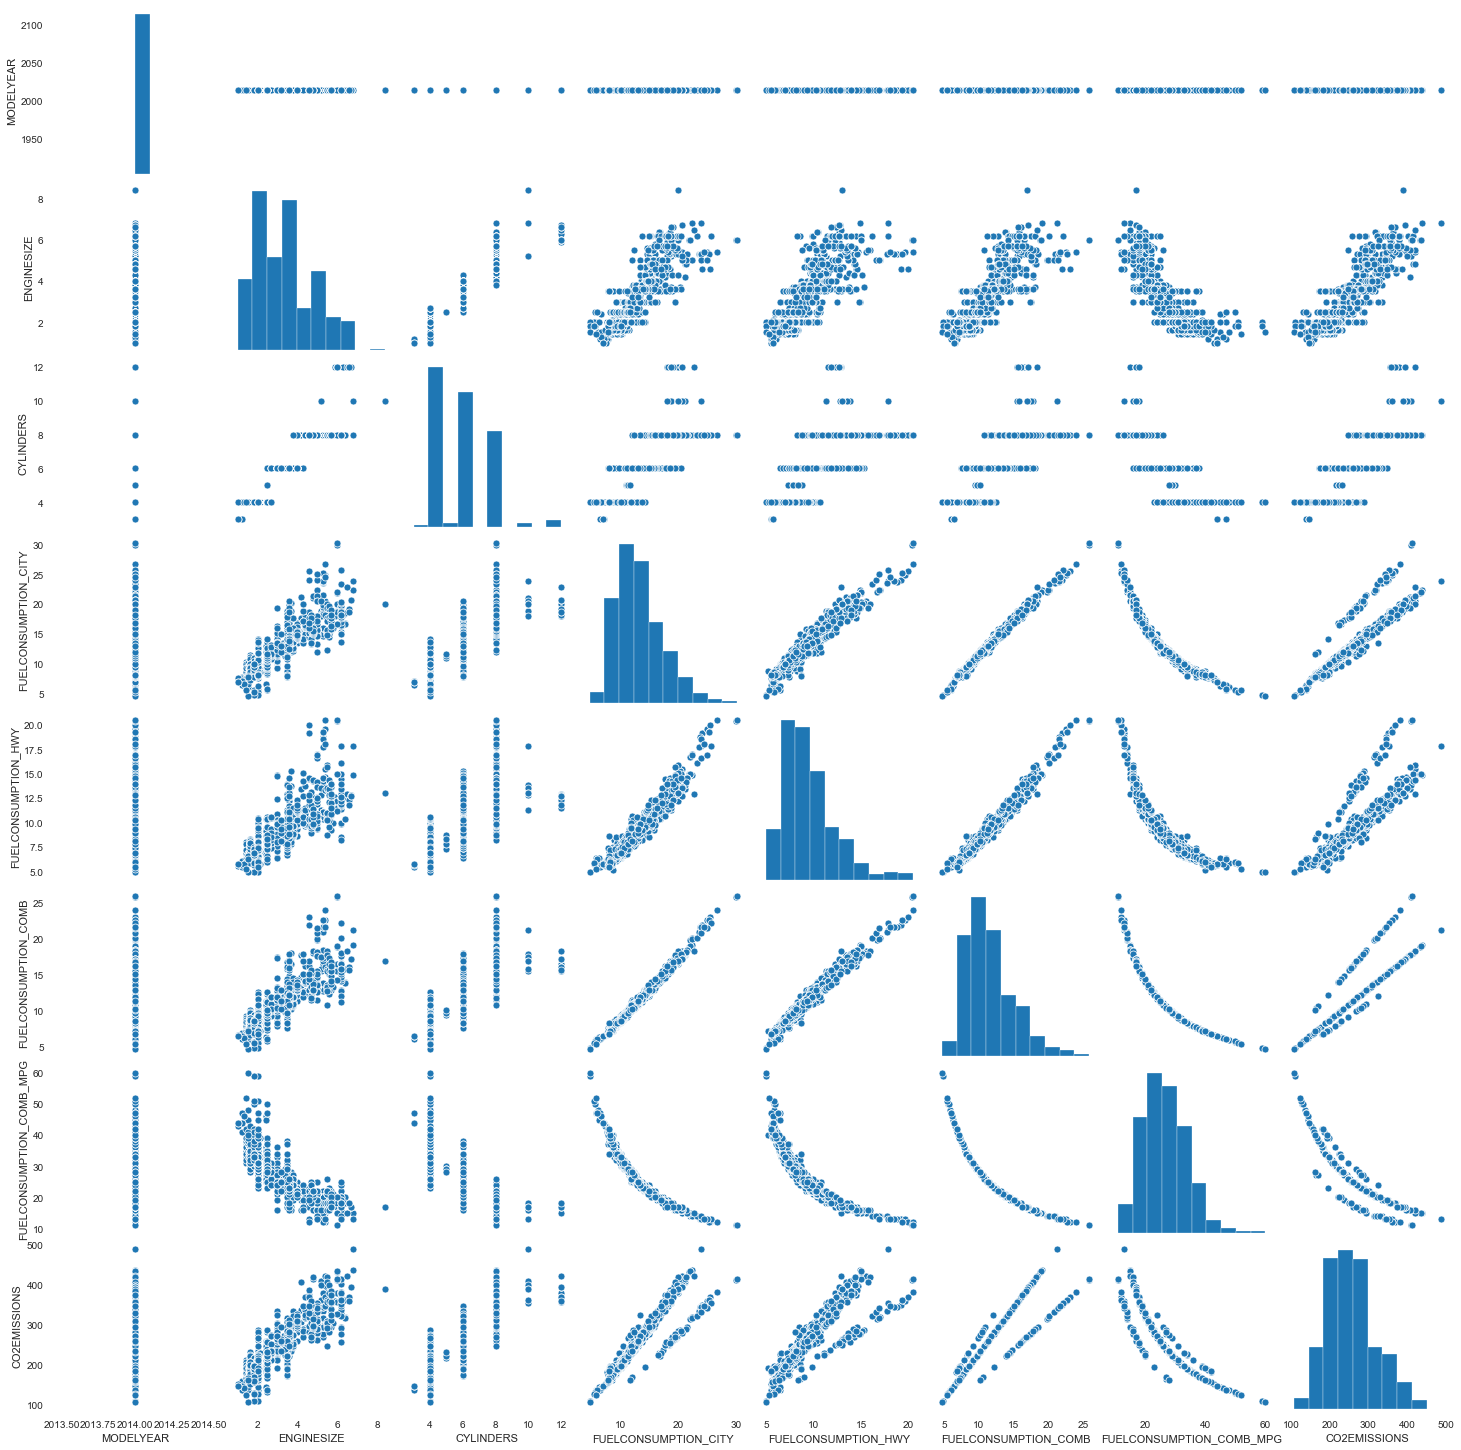

In [9]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='CO2EMISSIONS'>

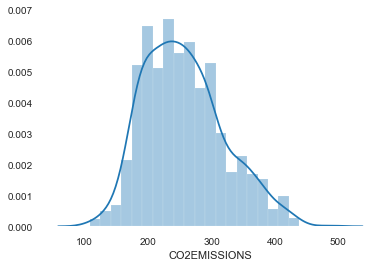

In [10]:
sns.distplot(df['CO2EMISSIONS'])

<AxesSubplot:>

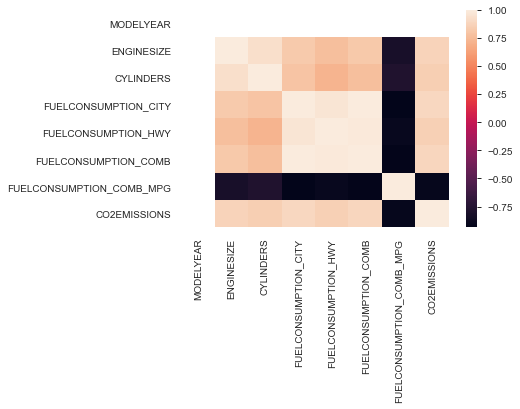

In [11]:
sns.heatmap(df.corr())

### Pandas profiling for EDA

In [12]:
from pandas_profiling import ProfileReport

In [13]:
ProfileReport(df)

### Seprating the Feature(X/input/indpendent) and Target(Y/Output/Dependending)

In [14]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']]

In [15]:
y = df['CO2EMISSIONS']

### Model Selection for Train and Testing process Splitting the Data in to 75% For Train and 25% Testing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

### Apply the linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

### Fit the Model

In [20]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### New_predication

In [21]:
prediction = model.predict(X_test)

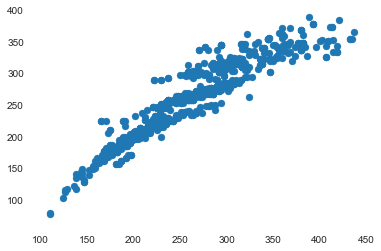

In [22]:
plt.scatter(y_test, prediction)

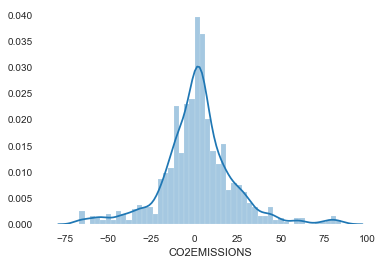

In [23]:
sns.distplot((y_test-prediction),bins=50);

###  Comparing the Actual Data and New predication and find the Error

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

458.5714752325494

### Find the Train Score and Test Score

In [25]:
model.score(X_train, y_train)

0.8800693157315532

In [26]:
model.score(X_test, y_test)

0.8836753549368974

###  Final Find the Overall Error in the data

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.8836753549368974